In [30]:
%%capture capt
%run 7_SVD.ipynb

In [56]:
def getHybrdRecommendations(userId):
    if(len(ratedMovies) == 0):
            return getPopularMovies()
    contentRecommended = getContentRecomMovies(userId, contentSimilarity)
    #sns.histplot(contentRecommended['score'])
    svdRatings = []
    indexMap = pd.Series(contentRecommended.index, index=contentRecommended['movieId'])
    for movie in contentRecommended['movieId']:
        prediction = svd.predict(randomUser, movie)
        svdRatings.append((prediction.est + contentRecommended.iloc[indexMap[movie]].score)*(5/6))
    hybridRecommended = contentRecommended
    hybridRecommended['score'] = svdRatings
    sns.histplot(hybridRecommended['score'])
    hybridRecommended = hybridRecommended.sort_values(['score'],ascending=False)
    return hybridRecommended[:11]

In [50]:
randomUser = random.choice(movieRatings['userId'])
ratedMovies = movieRatings[movieRatings['userId']==randomUser]
avgRating = np.mean(ratedMovies['rating'])
topRatedMovies = ratedMovies
topRatedMovies = topRatedMovies.sort_values(['rating'],ascending=False)
print("userId : ", randomUser)
print("Total movies rated : ",len(ratedMovies))
print("Avg ratings :" , avgRating)
print("Top rated movies: ")
topRatedMovies['title'][:20]

userId :  496
Total movies rated :  81
Avg ratings : 3.9382716049382718
Top rated movies: 


20767               Executive Decision
31638               Mr. Holland's Opus
39823                            Ghost
22618                         Outbreak
7010        Terminator 2: Judgment Day
25651                     The Fugitive
42891               Dances with Wolves
28739           Star Trek: Generations
41834                          Copycat
41236         The Silence of the Lambs
17282                    Jurassic Park
40235                          The Net
40092    The Bridges of Madison County
33389              Legends of the Fall
34251                       Virtuosity
35029                         Die Hard
35609                          Rob Roy
37594                        Tombstone
19669                     Forrest Gump
38343         The Shawshank Redemption
Name: title, dtype: object

movieId     score                           titles
2       1240  4.229342       Terminator 2: Judgment Day
5        589  4.189684                        Breakdown
57       905  4.150433                      Cliffhanger
12      1036  4.044057                         Vampires
151     2329  4.041153                Conspiracy Theory
11       296  4.037149  Confessions of a Dangerous Mind
87     81229  3.997165                      Wicker Park
64      3147  3.928776                    In Cold Blood
90        16  3.904630       Once Upon a Time in Mexico
134     1674  3.891268                     The Haunting
3     133782  3.877017       The Taking of Pelham 1 2 3

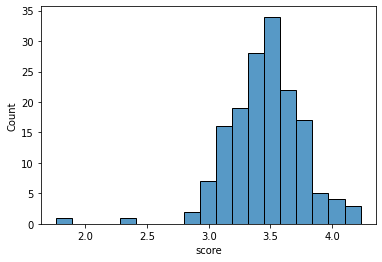

In [55]:
getHybrdRecommendations(randomUser)

movieId     score                                    titles
43      1544  0.620584             Robin Hood: Prince of Thieves
121     1370  0.497975           The SpongeBob SquarePants Movie
103     2393  0.493171                            The Terminator
104     1356  0.484604                                    Maggie
105     5944  0.461339     The Hunger Games: Mockingjay - Part 1
..       ...       ...                                       ...
9       2769  0.119090  The Princess Diaries 2: Royal Engagement
26       266  0.118681                      The Princess Diaries
60     78041  0.115378                           Very Bad Things
33      6852  0.115182                             The Contender
27     77866  0.111801                              Broken Arrow

[159 rows x 3 columns]

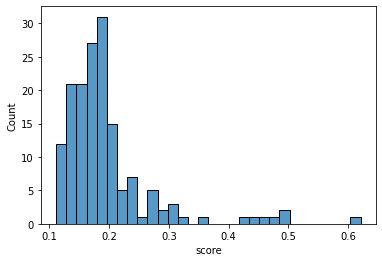

In [52]:
RecomContent = getContentRecomMovies(randomUser,contentSimilarity)
sns.histplot(RecomContent['score'])
RecomContent